In [4]:
import numpy as np
import pandas as pd
from datasets import load_dataset

# Load the dataset from Hugging Face
dataset = load_dataset("WenhaoWang/VidProM")

# Convert dataset to pandas DataFrame
df = pd.DataFrame(dataset['train'])  # Ensure the correct split is used

/home/bia/miniconda3/envs/genvid/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Display the first few rows of the dataframe
df.head(10)

,uuid,prompt,time,toxicity,obscene,identity_attack,insult,threat,sexual_explicit
0,6a83eb92-faa0-572b-9e1f-67dec99b711d,"Flying among clouds and stars, kitten Max disc...",Sun Sep 3 12:27:44 2023,0.00129,0.00016,0.00007,0.00064,0.00002,0.00002
1,3ba1adf3-5254-59fb-a13e-57e6aa161626,Use a clean and modern font for the text &quot...,Wed Sep 13 18:15:30 2023,0.00038,0.00013,0.00008,0.00018,0.00003,0.00003
2,f88d8fff-1c26-59d2-8252-23ee67762b12,dancing sticks .screen size must be 9:16,Thu Sep 21 18:00:43 2023,0.01793,0.00536,0.00105,0.00199,0.00048,0.00118
3,871c822c-2a73-5fa6-b4ff-67f821813be1,promt robots hugging,Fri Aug 18 04:47:26 2023,0.02472,0.00682,0.00056,0.00850,0.00182,0.00092
4,3cbb0e22-a3b4-5841-a5a1-12db24ae656a,"ridley scott space documentary, 2020",Sat Sep 2 22:50:12 2023,0.00046,0.01469,0.00226,0.01080,0.00080,0.00050
5,e9d2b31b-7c9b-5154-8b49-f5b8f92902e8,wide shot ostrich roaming Iceland,Thu Oct 19 09:07:17 2023,0.02580,0.00699,0.00143,0.00247,0.01966,0.00156
6,c80c659e-0215-5e90-88e8-0cbb40b05420,"a dark and ominous forest, heavy rain pouring ...",Sun Oct 8 23:33:08 2023,0.00118,0.00029,0.00014,0.00047,0.00004,0.00003
7,61c802f7-57a8-5408-affa-f3240d992e3b,video 4k Message: 1 Attachment,Mon Oct 9 14:09:56 2023,0.00035,0.01896,0.00301,0.01254,0.00120,0.00058
8,62e5a2a0-4994-5c75-9976-2416420526f7,"zoomed out, sideview of an Grey Alien sitting ...",Tue Oct 24 20:24:21 2023,0.01777,0.00029,0.00336,0.00256,0.00017,0.00005
9,1b83b6b3-7985-5410-9cef-a6a2cdb634d3,"giant army with swords and bows in the desert,...",Tue Oct 24 09:33:02 2023,0.01832,0.00278,0.00047,0.00376,0.00037,0.00054


In [7]:
df.columns

Index(['uuid', 'prompt', 'time', 'toxicity', 'obscene', 'identity_attack',
       'insult', 'threat', 'sexual_explicit'],
      dtype='object')

In [10]:
# making a df with only the prompts and video ids (uuid)
dd = df[['prompt', 'uuid']]
dd.head()

,prompt,uuid
0,"Flying among clouds and stars, kitten Max disc...",6a83eb92-faa0-572b-9e1f-67dec99b711d
1,Use a clean and modern font for the text &quot...,3ba1adf3-5254-59fb-a13e-57e6aa161626
2,dancing sticks .screen size must be 9:16,f88d8fff-1c26-59d2-8252-23ee67762b12
3,promt robots hugging,871c822c-2a73-5fa6-b4ff-67f821813be1
4,"ridley scott space documentary, 2020",3cbb0e22-a3b4-5841-a5a1-12db24ae656a


In [11]:
print(f"There are {len(dd['prompt'])} unique prompts")
# print(f"We wil start by sampling {np.floor(.0001 * len(dd['prompt']))} prompts")

There are 1672243 unique prompts


In [12]:
# choosing the first 100 prompts to start with
first = dd.head(100)
display(first)
for i, row in first.iterrows():
    print(f"Prompt: {row['prompt']}")
    pass

,prompt,uuid
0,"Flying among clouds and stars, kitten Max disc...",6a83eb92-faa0-572b-9e1f-67dec99b711d
1,Use a clean and modern font for the text &quot...,3ba1adf3-5254-59fb-a13e-57e6aa161626
2,dancing sticks .screen size must be 9:16,f88d8fff-1c26-59d2-8252-23ee67762b12
3,promt robots hugging,871c822c-2a73-5fa6-b4ff-67f821813be1
4,"ridley scott space documentary, 2020",3cbb0e22-a3b4-5841-a5a1-12db24ae656a
...,...,...
95,Make a breakdancing dragon,78484276-4ff2-59c4-b894-2eb7c6142603
96,Russian tourists in restaurants Sri Lanka Mes...,0df27c4b-7bb7-576c-adef-66542363c82c
97,"Mediaval age, Sharp features, cinematic, A old...",549a5812-3dcf-5839-8207-7124ea0f157b
98,Make the background and characters move,1634070d-3d72-556d-ad99-c47744fbfcfe


Prompt: Flying among clouds and stars, kitten Max discovered a world full of winged friends. Returning home, he shared his stories and everyone smiled as they imagined flying together in their dreams.  
Prompt: Use a clean and modern font for the text &quot;Relate Reality 101.&quot; Add a small, stylized heart icon or a thought bubble above or beside the text to represent emotions and thoughts. Consider using a color scheme that includes warm, inviting colors like deep reds, soft blues, or soothing purples to evoke feelings of connection and intrigue.  
Prompt: dancing sticks .screen size must be 9:16  
Prompt: promt robots hugging  
Prompt: ridley scott space documentary, 2020  
Prompt: wide shot ostrich roaming Iceland  
Prompt: a dark and ominous forest, heavy rain pouring down. Thunder rumbles in the distance as the camera pans through the wet, glistening leaves. fantastic,fairy, sureal, 4k, --ar 9:16  
Prompt: video 4k  Message: 1 Attachment  
Prompt: zoomed out, sideview of an Gr

## Notes
- can see that prompts have different formats 
    - some specifyu styles of videos, some specify screen size
- prompt length varies a LOT 
- not consistent capitalizization & some have symbols -- i.e &quot

/tmp/ipykernel_143644/1860406029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first['prompt_length'] = first['prompt'].apply(lambda x: len(x.split()))


count    100.000000
mean      15.040000
std       14.372336
min        1.000000
25%        6.000000
50%       11.500000
75%       17.000000
max       80.000000
Name: prompt_length, dtype: float64

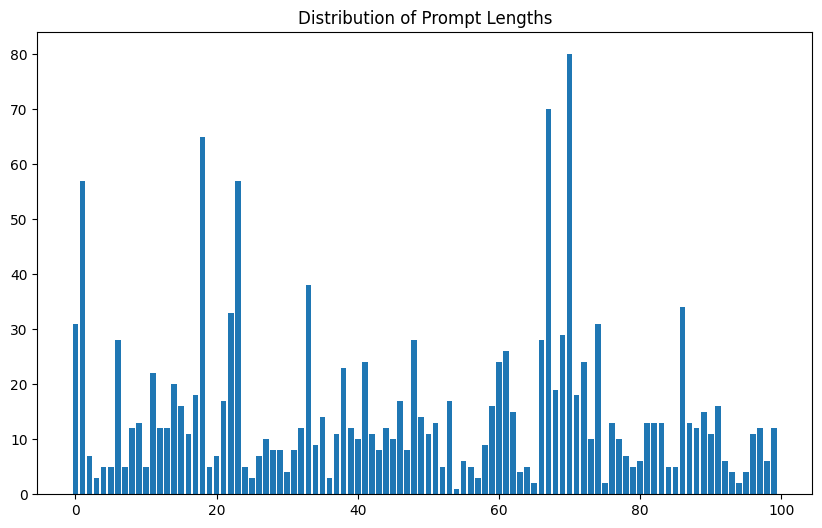

In [13]:
# adding length of prompt to the dataframe
first['prompt_length'] = first['prompt'].apply(lambda x: len(x.split()))
display(first['prompt_length'].describe())
# checking the distribution of prompt lengths
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.bar(range(len(first['prompt_length'])), first['prompt_length'])
plt.title('Distribution of Prompt Lengths')
plt.show()

## Watching the videos

I was struggluing to find the video from the uuid, so instead i found the uuid/prompt fromnt he video -- after downloading them 

In [28]:
from prompt_extractor import PromptExtractor

# Initialize the PromptExtractor
file_beginnings = ['t2vz-', 'pika-', 'vc-', 'ms-'] # these are the prefixes of the video files in the sample folder
pe = PromptExtractor(df, file_beginnings)

# Load in video names from folder 
video_folder = '/home/bia/Documents/genvid/sample_videos' # This is where the sample videos are stored
videos = pe.list_video_files(video_folder)
print(videos)
# pe.test(video_files)
# process the videos to extract prompts
extracted_prompts = pe.process_video_files(videos)
# Display the first few extracted prompts
display(extracted_prompts.head())
extracted_prompts[extracted_prompts['uuid'] == '0aa8113f-ee4a-5086-a7a6-e1c6d8b245aa'] # check for a specific uuid to see if it worked

['t2vz-0aa8113f-ee4a-5086-a7a6-e1c6d8b245aa.mp4', 'ms-00b62d63-510a-59e9-a694-cdf5a95ba537.mp4', 't2vz-0a1e22f6-5863-5c21-8514-78baee8d8a92.mp4', 'vc-0aa67e3c-ebc0-5667-a772-504be8e26bcf.mp4', 'pika-0a4d0ce2-8b90-5409-98da-a98cc46c363e.mp4', 'pika-0a0d4433-3116-5e2f-81e0-b35b2ec73ba3.mp4', 'ms-0b73d1b6-bf79-5a8f-abda-bdbc77b2e5be.mp4', 't2vz-0a1fa151-ae9e-5b84-9e1b-0d0b8024ade4.mp4', 't2vz-0a7dd8e7-9095-558c-b1b9-543b4514f5d2.mp4', 'pika-0a1a0fa2-0cbd-56d9-ab7a-7ffbf21d9e2c.mp4', 'ms-0aabc111-e517-5681-94d5-6c8f07859895.mp4', 'pika-0a3c36a4-ff51-5a17-a4ea-f545e1dc7f75.mp4', 'vc-00b7cb01-5d8b-5652-8633-4668238d52b5.mp4', 't2vz-0a6f8c06-69b4-5336-b957-caec839509dc.mp4', 'pika-0a2ab830-9ab2-5d5a-9964-bbb1a7274d39.mp4', 'pika-00a3d5c8-6c40-5881-8dc8-0ac9eed62b9e.mp4', 'pika-0a3a92fa-003b-5c8f-a518-592e5c6eb970.mp4', 'vc-0a3eef13-d33a-581c-8a3d-4c09f7df02df.mp4', 't2vz-0a40da8e-60ef-50be-8df3-d9423f2dab6c.mp4', 't2vz-0a850633-e1d4-5c2e-815e-d0f316d91c21.mp4', 'pika-0a0f5a43-f8ba-5afa-8210-5

,uuid,prefix,prompt
0,0aa8113f-ee4a-5086-a7a6-e1c6d8b245aa,t2vz-,"a elephant is walking in the forest, sunset -a..."
1,00b62d63-510a-59e9-a694-cdf5a95ba537,ms-,Draw a detailed colorful image showing the tra...
2,0a1e22f6-5863-5c21-8514-78baee8d8a92,t2vz-,"image of a sweet baby slumbering on a fluffy, ..."
3,0aa67e3c-ebc0-5667-a772-504be8e26bcf,vc-,a black and gold batman surrounded by three ba...
4,0a4d0ce2-8b90-5409-98da-a98cc46c363e,pika-,mother nature wearing a veil in front of a cro...


,uuid,prefix,prompt
0,0aa8113f-ee4a-5086-a7a6-e1c6d8b245aa,t2vz-,"a elephant is walking in the forest, sunset -a..."


### Notes

looking at the videos in the sample, we can see that 
- some videos are watermarked 
- the videos from t2vz are not the most realistic -- for example, a video uuid: 0a64622a-f379-5f6d-a7f5-4d8e9d561f37 from t2vz had prompt: Scene 7: Masked Dance  Brief snippets of hands and elegant clothing, showcasing the character dancing with different masked partners.  
looks like
<img src = "t2vz_mask_example.png" width = "200px"/>

In [ ]:
baby_example = process_video_files(['t2vz-0a1e22f6-5863-5c21-8514-78baee8d8a92.mp4'], file_beginnings)  # Call the function to process video files
print(baby_example)

this video is also pretty unrealistic -- a lot of the t2vz videos are more choppy

In [82]:
video = ['t2vz-0abf1bfb-7300-5912-886a-b7b785cb7712.mp4']
print(process_video_files(video, file_beginnings))  # Call the function to process video files and get structured data


## Looking at the prompts
- using the prompts generated fromt hwe vdieos we can watch so we can see them all